In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def initial(init,N):
    # initial configurations
    if init == 'up':
        s = np.ones(N)
    elif init == 'down':
        s = -np.ones(N)
    elif init == 'random':
        s = np.random.randint(0,2,N)*2 -1
    else:
        print('wrong initial conditions')
    return s

In [5]:
def energy(s,J,B):
    # compute the configurational energy of the spin chain
    e = -J*s.dot(np.roll(s,-1))-B*np.sum(s)
    return e

In [13]:
def flip_spin(s):	
    # generate spin chain by flipping one spin at a time
    index=np.random.randint(0,len(s))
    s[index] *= -1
    return s

In [14]:
def montecarlo(s,J,B,T,N,n_steps):
    energies = np.zeros(n_steps) # hold the total energy along the MC run
    magnetizations = np.zeros(n_steps) # hold the mean magnetization along the MC run
    microstates = np.zeros((n_steps,N)) # hold the actual states along the MC run
    #
    energies[0]=energy(s,J,B)
    magnetizations[0]=np.sum(s)/N
    microstates[0, :]=s[:]
    #
    for i in range(1,n_steps):
        new_s = s.copy() # trial step is a copy of the current state
        new_s = flip_spin(new_s) # but with one random spin flipped
        #
        new_energy=energy(new_s,J,B)
        old_energy=energies[i-1]
        boltzmann_factor = np.exp((old_energy-new_energy)/T)
        r = np.random.random()
        if r < min(1,boltzmann_factor) :
        # if the random number is lower than the boltzman factor
        # accept the trial move
            s = new_s.copy()
            energies[i]=new_energy
            magnetizations[i]=np.sum(s)/N
            microstates[i, :]=s[:]
        else:
        # otherwise, keep the old state
            energies[i]=old_energy
            magnetizations[i]=magnetizations[i-1]
            microstates[i, :]=s[:]
    return energies, magnetizations, microstates

In [36]:
N = 1000
J = 1.0 # Arbitrary units (kb=1.0)
B = 0.0
T = 0.8 # Temperature will be given in units of kb/J
n_steps = 100000

In [37]:
s = initial('random',N)
energies,magnetizations,microstates = montecarlo(s,J,B,T,N,n_steps)

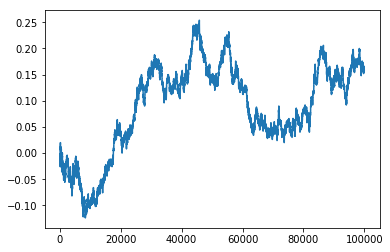

In [38]:
plt.plot(magnetizations)
plt.show()

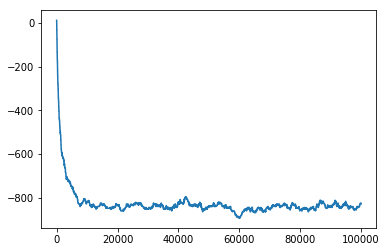

In [39]:
plt.plot(energies)
plt.show()

In [66]:
N = 100
J = 1.0 # Arbitrary units (kb=1.0)
B = 0.0
n_steps=1000000
n_equilibration=20000
#
n_temperatures=10
T_max = 1.
T_min = 0.
#
temperatures=np.zeros(n_temperatures)
mean_energies=np.zeros(n_temperatures)
var_energies=np.zeros(n_temperatures)
mean_magnetizations=np.zeros(n_temperatures)
#
s = initial('random',N)
for i,T in enumerate(np.linspace(T_max,T_min,n_temperatures,False)):
    energies,magnetizations,microstates = montecarlo(s,J,B,T,N,n_steps)
    temperatures[i]=T
    mean_energies[i]=np.average(energies[n_equilibration:])
    var_energies[i]=np.var(energies[n_equilibration:])
    s=microstates[-1,:].copy()


In [68]:
def analytic_1DIsing_energy(N,J,T_max,n_temperatures):
    temperatures=np.linspace(T_max,1.e-5,n_temperatures+1)
    return temperatures,-N*np.tanh(J/temperatures)
#
def analytic_1DIsing_specificheat(N,J,T_max,n_temperatures):
    temperatures=np.linspace(T_max,1.e-5,n_temperatures+1)
    return temperatures,(J/temperatures)**2/np.cosh(J/temperatures)**2

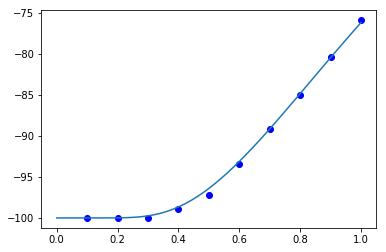

In [67]:
plt.plot(temperatures,mean_energies,'bo')
plt.plot(analytic_1DIsing_energy(N,J,T_max,100)[0],analytic_1DIsing_energy(N,J,T_max,100)[1])
plt.show()

/Users/oliviero/Sources/anaconda3/envs/idp/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in cosh
  
/Users/oliviero/Sources/anaconda3/envs/idp/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


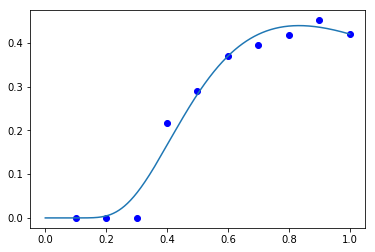

In [77]:
plt.plot(temperatures,var_energies/temperatures**2/N,'bo')
plt.plot(analytic_1DIsing_specificheat(N,J,T_max,1000)[0],analytic_1DIsing_specificheat(N,J,T_max,1000)[1])
plt.show()